In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pokemon-challenge/combats.csv
/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv


In [20]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")

In [21]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# Correlation Map

Özellikler arasındaki ilişiyi anlamamızı sağlayan parametlerden biridir. 
Eğer 2 özellik arasındaki correlation 1 ise bunlar birbiri ile doğru orantılıdır.

In [23]:
# Özellikler arasındaki correlatinı verir
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


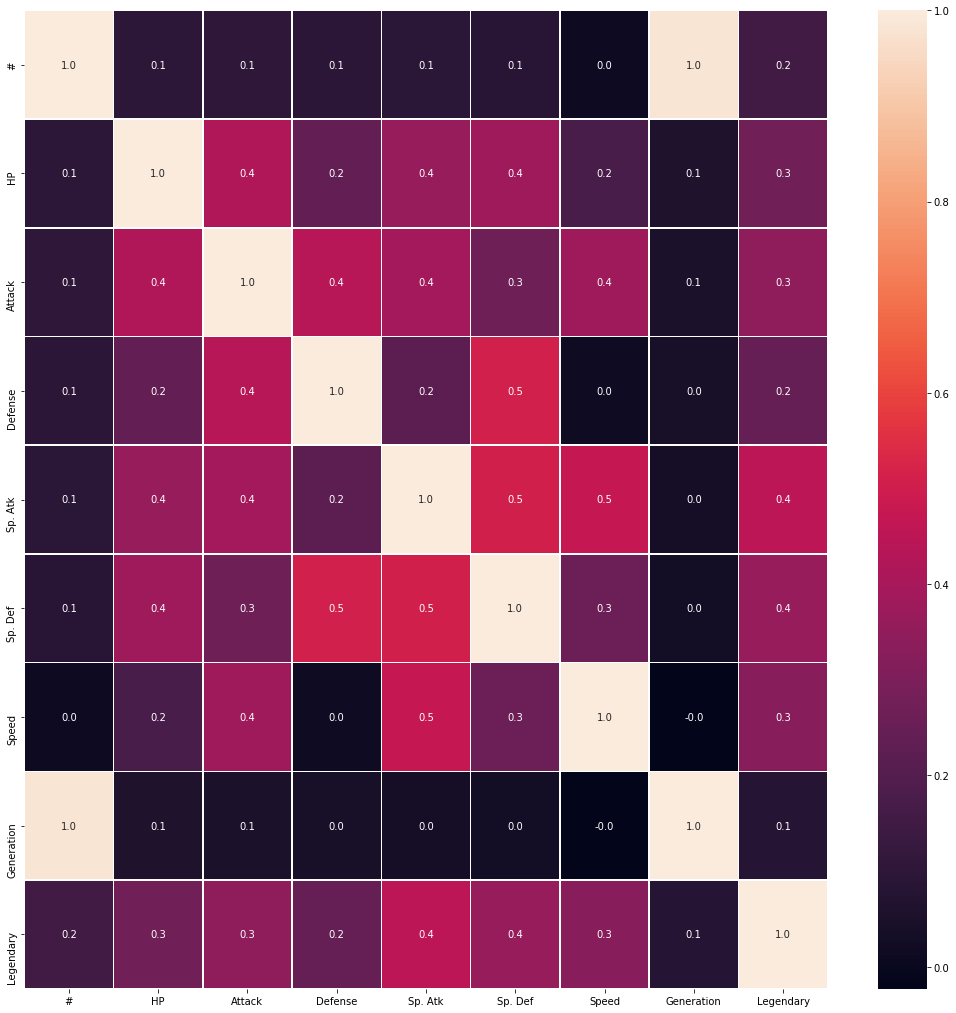

In [24]:
# annot = true : kutuların içindeki sayıların gözükmesini sağlar
# linewidths : 2 kutunun arasındaki kalınlık
# fmt = 0 dan sonra yazılacak değer - 01 gibi

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [25]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# 1. Introduction to PYTHON

## Matplotlib

* Line Plot

x axis = time ise 

* Scatter Plot 

2 özellik arasında correlation olup olmadığını anlamak istenildiğinde

* Histogram Plot 

Datanın distribution'ını anlamak istenildiğinde kullanılır. (Distribution bir featurenin sıklığı)


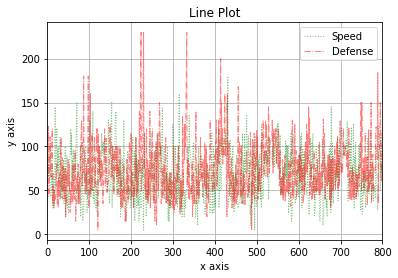

In [26]:
# datamızın columnlarından olan Speed'i al plot ettir 
# kind = line / scatter / histogram
# grid = True, grafik üzerindeki bölümlemeler

data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

## Scatter Plot

2 özellik arasında correlation'ı bulmak için 

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

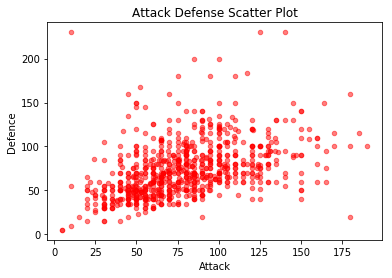

In [27]:
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

## Histogram

Data'nın distributonını (yogunlugun) görmek içiN


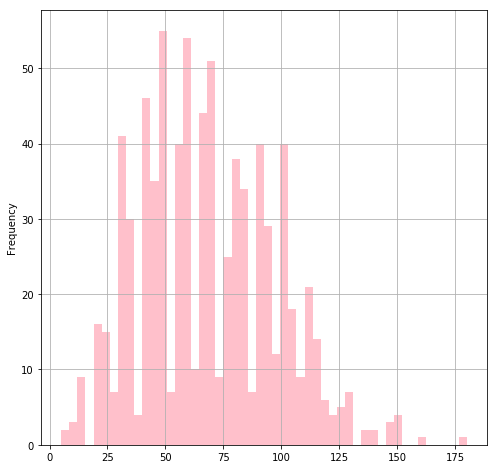

In [28]:
# bins = barların sayısı
data.Speed.plot(kind = 'hist',bins = 50,figsize = (8,8), color="pink", grid=True)
plt.show()

## CLF metodu
yapılan grafiği silmeye yarar

In [29]:
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()

<Figure size 432x288 with 0 Axes>

# Dictionary

* Küçük bir dataframe yapısı gibidir.
* İçinde 'key', 'value' yapısı vardır;
    1. dictionary = {'spain' : 'madrid'}
    1. key = spain , value=madrid
* Listeden daha hızlıdır


In [30]:
# dictionary oluşturma
dictionary = {'spain' : 'madrid' , 'usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [31]:
# dictionary elemanlarını update etme 
dictionary['spain']='barcelona'
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}


In [32]:
# eleman ekleme
dictionary['france'] = 'paris'
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}


In [33]:
# eleman silme

del dictionary['france']
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}


In [34]:
#dictionary'de eleman arama

'spain' in dictionary

True

In [35]:
# dictionary silme
dictionary.clear()

In [36]:
print(dictionary)

{}


In [37]:
# memoryde yer kalmasını istemiyorsak ;
del dictionary
print(dictionary) # olmadığı için hata verir

NameError: name 'dictionary' is not defined

# PANDAS
1. Seriler / tek boyutlu

2. DataFrameler



In [38]:
# Dosyayı okuma
data = pd.read_csv('/kaggle/input/pokemon-challenge/pokemon.csv')

In [39]:
series = data['Defense'] 
print(type(series))

<class 'pandas.core.series.Series'>


In [40]:
dataframe = data[['Defense']]
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


* logic, control flow, filtering.
* Comparison operator: ==, <, >, <=
* **Boolean operators:** and, or ,not
* Filtering pandas

### Filtering Pandas data frame

In [41]:
x = data['Defense']>200
x.head(3)

0    False
1    False
2    False
Name: Defense, dtype: bool

In [42]:
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [43]:
#logical_and = ikili filtelemede kullanılır
# numppy küt oldugu için np yazılır

data[np.logical_and(data['Defense']>200, data['Attack']>100)]

# 2.yol
# data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [44]:
data[np.logical_and(data['HP']<75, data['Sp. Def']>200) ]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


## LOOPS
## While

In [45]:
i=0
while i!=5:
    print('i is:', i)
    i+=1
print(i, 'is equal to 5')

i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
5 is equal to 5


## For

In [46]:
lst = [1,2,3,4,5]
for i in lst:
    print('i is:',i)
print('')

i is: 1
i is: 2
i is: 3
i is: 4
i is: 5



In [47]:
# listenin içindeki eleman ve indexlere erişim sağlamak istenildiğinde enumerate kullanılır
for index, value in enumerate(lst):
    print(index, " :",value)
print('')

0  : 1
1  : 2
2  : 3
3  : 4
4  : 5



In [48]:
# dictinary'de kullanmak için --> dictinary.items

dictinary = {'spain':'madrid','france':'paris'}

for key,value in dictinary.items():
    print(key, ' : ', value)
print('')

spain  :  madrid
france  :  paris



In [49]:
# dosyadan okunan veriler için for
# [0:1] = -> ilk elemandan 5. elemana kadar getir demek

for index, value in data[['Attack']][0:5].iterrows():
     print(index," : ",value)

0  :  Attack    49
Name: 0, dtype: int64
1  :  Attack    62
Name: 1, dtype: int64
2  :  Attack    82
Name: 2, dtype: int64
3  :  Attack    100
Name: 3, dtype: int64
4  :  Attack    52
Name: 4, dtype: int64


# 2. Python Data Science Toolbox

### User Defined Function 
docstring : fonksiyonun ne yaptığını açıklayan stringdir

tuble : parantez içine veri alan data type'dır-> tuble = ( a, b, c)

In [50]:
def tuble_ex():
    """ t 'yi return eder'"""
    t = (14,25,36)
    return t

a,b,c = tuble_ex()
print(a,b,c)

# yap fonk. 2 değer döndürüyor a ve b. A yı kullanmak istiyoruz 
# b yi kullanmak istemiyoruz o zaman;
# a,_=yap()

14 25 36


### Scope
* global scope : main bodde tanımlı olan - herkes tarafından erişilir
* local scope : fonk.'da tanımlı olan - fonk tarafından erişilir
* built in scope : programlama dilinde daha önceden belli görev için tanımlanmış olan - len(), print gibi

In [51]:
x = 5 # global

def func():
    x=14 #local
    return x
print (x)
print (func())

5
14


In [52]:
# built in scope 'ları görmek için
import builtins
dir (builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

### Nested Function


İç içe 2 fonksiyon

In [53]:
def square():
    """return aquares of value"""
    def add():
        """add 3 local variable"""
        x=5
        y=3
        z=7
        return x+y+z
    return add()**2
print(square())

225


### Default and Flexible Arguments

#### Default Argument
def f(a,b=1):

f fonk'u 2 değer alır eger 1 değer alırsa b yerine 1 alınsın

In [54]:
def fun(a, b=1, c=2):
    y = a+b+c
    return y
print("*",fun(5))
print('')
print("*",fun(5,8,9))

* 8

* 22


#### **Flexible**

def fun(*args):

func ararken 1 ya da daha fazla arguman yollamak istenildiğinde her arg için fonk tanımlama yapmak yerine kullanılır


In [55]:
def fun(*args):
    for i in args:
        print(i)
fun(1)
print("")
fun(2,4,6,8)
print("")
print("--")

#kwargs dictionary'de kullanılır

def fun(**kwargs):
    for key,value in kwargs.items():
        print(key, ': ', value)
fun( country= 'spain', capital='madrid', population= 123456)

1

2
4
6
8

--
country :  spain
capital :  madrid
population :  123456


### Lambda Function
hızlı ve kolayca fonk yazma

In [56]:
square = lambda x:x**2
print(square(7))

49


In [57]:
summation = lambda x,y,z: x+y*z
print(summation(3,6,9))

57


### Anonymous Functions

birden fazla arguman alabilen lambda fonks'dur

* map(fun,seq): lambda fonkunu tm list için çalıştıran fonksdur

In [58]:
num_list = {1,2,3}
y = map(lambda x:x**2, num_list)
print(list(y))

[1, 4, 9]


### Iterators



In [59]:
name = "ronaldo"
it = iter(name)
print(next(it)) #stringin ilk elemanını verir
print(*it) # geri kalanını verir

r
o n a l d o


#### Zip metodu

In [60]:
list1 = [1,2,3,4] #index olsun
list2 = [5,6,7,8] #indexe ailt elemanlar olsun
z = zip(list1,list2)
print(z)
print("-")
z_list = list(z)
print(z_list)

-
[(1, 5), (2, 6), (3, 7), (4, 8)]


#### Unzip metodu

In [61]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuble
print(un_list1)
print(un_list2)
print(type(un_list2))

#print(type(list(unlist1))) listeye çevirme

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


### List Comprehension
single line'de loop yaparak yeni listeler oluşturmak

In [62]:
num1=[1,2,3]
num2 = [i+1 for i in num1]
print(num2)

[2, 3, 4]


In [63]:
# conditionals on iterable

num1=[5,10,15]
num2=[i**2 if i==10 else i-5 if i<7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [64]:
#pokemon csv dosyamızı data değişkenine atamıştık
data.head(1)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False


In [65]:
# csv dosyasındaki verimizde conditionals iterable yapma
threshold = sum (data.Speed)/len(data.Speed) #ort.hız
data["speed_level"]=["high" if i>threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


# 3. Cleaning Data

### a. Diagnose data 

(teşhis etmek)

Unclean Data
* upper-lower sorunları
* missing data
* farklı dil
* column isimlerinde bosluk olması


In [66]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")
data.head() #ilk 5 datayı gösterir

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [67]:
data.tail()#son 5 datayı gösterir

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [68]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [69]:
data.shape 
# 800 row, 12 columns

(800, 12)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### b.Exploratory Data Analysis

In [71]:
# value_counts()

d = data["Type 1"].value_counts(dropna=False)
print(d)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


> ### Quantile 

1,4,5,6,8,9,11,12,13,14,15,16,17
The **median** is the number that is in middle of the sequence. In this case it would be **11**.

> Lover Quantile (Q1, %25)

The **lower quartile** is the median in between the smallest number and the median i.e. in **between 1 and 11**, which is **6**.

> Upper Quantile (Q3, %75)

The **upper quartile**, you find the median between the median and the largest number i.e. **between 11 and 17**, which will be **14** according to the question above.

> Outliers (Aykırı,Ayrık)

Data'ya aykırı value diyebilmek için;

* ( Q3 - Q1 ) = IQR
* sonuc = Q1 - (IQR * 1.5)
* sonuc = outlier'dır

&

* sonuc = Q3 + (IQR * 1.5)
* sonuc = outlier'dır

> Describe method : 

* count 
* mean
* std
* min
* 25%
* 50% - median
* 75%
* max

In [72]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Visual Exploratory Data Analysis

> Box Plot

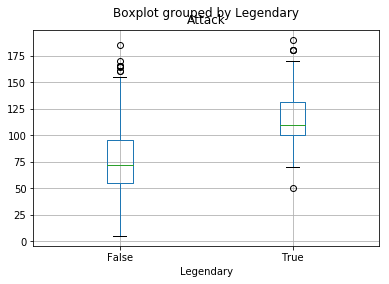

In [73]:
data.boxplot(column='Attack', by='Legendary')
plt.show()

#grafikte yuvarlak yerler aykırı değerleri göstermektedir

### Tidy Data

> melt() fonk

![](http://)Datadan belli başlı yeni özellikler çıkararak datayı değerler sabit kalıcak şekilde farklı yapıya büründürmek

In [74]:
data_new = data.head()
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [75]:
# Data'da ismi değişmeden kalmasını sağlama : id_vars
# Yeni oluşması istenen datalar ise Attack ve Defense
melted = pd.melt(frame=data_new, id_vars="Name", value_vars=["Attack","Defense"])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


### Pivoting Data

melt 'i eski haline getirme

In [76]:
melted.pivot(index="Name", columns="variable", values="value")

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


### Concatenating Data

> 2 dataframe'i birleştirme

In [77]:
#dikey concat
data1 = data.head()
data2 = data.tail()

conc_data_row = pd.concat([data1,data2], axis=0, ignore_index=True)
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [78]:
#Yatay concat

data1 = data["Attack"].head()
data2 = data["Defense"].head()

concat2 = pd.concat([data1,data2], axis=1)
concat2

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


### Data Types

* objects ( string )
* boolean
* integer 
* float
* categorical

In [79]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [80]:
# Convert etme

float("0.8")

0.8

In [81]:
data["Type 1"] = data["Type 1"].astype('category')
data["Speed"] = data["Speed"].astype('float')

In [82]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

### Missing Data and testing with Assert


- değeri olmayan özelliklerdir
- Nan değerler


*Ne yapılabilinir?*

- Öylece bırak
- Nan değer olan column'u dahil etme
- Nan yazmayan boş değerlere Nan yazma
- Boş verilere diğer verilerin ortalaması ile doldurulabilinir

In [83]:
data.head(8)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80.0,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100.0,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100.0,1,False


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null category
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null float64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 65.0+ KB


In [85]:
# Type 2'de kaç farklı değer var hesapla
# dropna=False -> Nan'larıda dahil et

data["Type 2"].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ghost        14
Ice          14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [86]:
# 386 missing value var
# Nan olanları listeden at
# inplace=True -> yapılan değişiklikleri kaydet

data["Type 2"].dropna(inplace=True)

In [87]:
#yukarıda yapılan işlemin işe yarayıp yaramadığını anlamak için;

assert 1 == 1

#birşey döndürmüyorsa doğru demektir

In [88]:
assert data["Type 2"].notnull().all()

#Type 2 deki hepsi notnull mı? 
## birşey döndürmediği için doğru

In [89]:

data["Type 2"].fillna('empty', inplace=True)

In [90]:
data.head(1)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False


In [91]:
assert data.columns[1] =="Name"

# 1.column Name old. için birşey döndürmez

In [92]:
assert data.Speed.dtypes == np.float

# 4. Pandas Foundation

- single column=series
- Nan = not a number
- dataframe.values=numpy

### Building Data Frames From Scratch

- Dataframelerin dictiniorylerden built etmek

In [93]:
country = ["Turkey","England"]
population = ["100", "120"]
list_label= ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Turkey,100
1,England,120


In [94]:
# yeni column ekleme

df["Capital"]=["Ankara","Londra"]
df

,country,population,Capital
0,Turkey,100,Ankara
1,England,120,Londra


In [95]:
# Broadcasting : df yeni column ekleyip aynı değeri atama

df["Income"]=0
df

,country,population,Capital,Income
0,Turkey,100,Ankara,0
1,England,120,Londra,0


### Visual Exploratory Data Analysis

- Plot
- Subplot
- Histogram
  - bins
  - range
  - normed 
  - cumulative

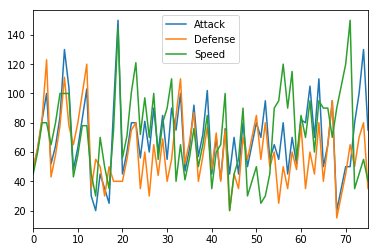

In [96]:
# Plotting Data

data1 = data.loc[:75,["Attack", "Defense", "Speed"]]
data1.plot()

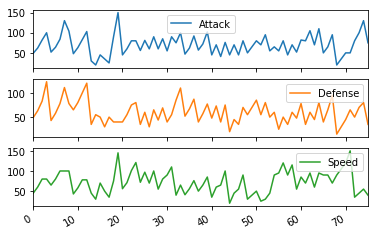

In [97]:
# yukarıdaki grafiği farklı grafiklere bölmek için;

# Subplot

data1.plot(subplots=True)
plt.show()

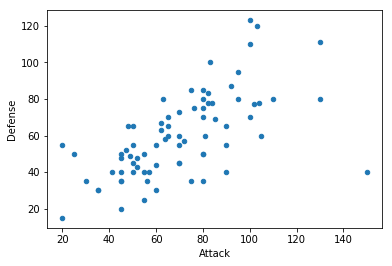

In [98]:
# Scatter Plot
# corr bamak için kullanılır genelde
data1.plot(kind="scatter", x="Attack", y="Defense")

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


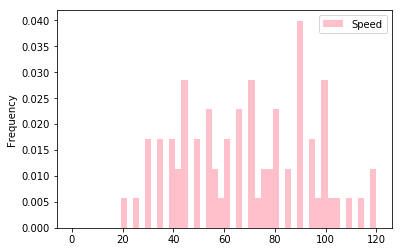

In [99]:
# Hist plot
# range = () : y eksenidir kaça kadar bakılması istenliyorsa o sayı yazılır
# normed = True : Veriyi 0-1 arasında normalize etmek demek

data1.plot(kind="hist", y="Speed", bins=50, color="pink", range=(0,120), normed=True)

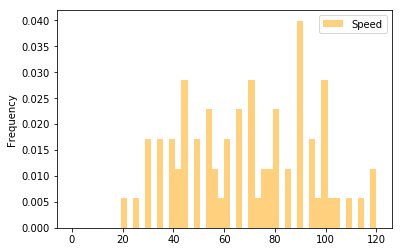

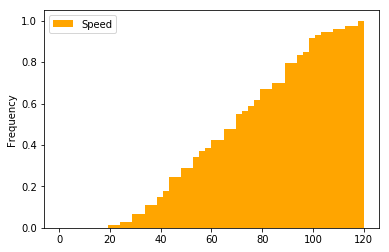

In [100]:
# cumulative=True eklendiğinde 2. grafik oluşmaktadır
# cdf = cumulative distribution function
data1.plot(kind="hist", y="Speed", bins=50, color="orange", alpha=0.5, range=(0,120), normed=True)
data1.plot(kind="hist", y="Speed", bins=50, color="orange", range=(0,120), normed=True, cumulative=True)

In [101]:
# Statistical Exploratory Data Analysis

data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [102]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


### Indexing Pandas Time Series

* Indexlerin time serilerden oluşması
* datetime = object
* parse_dates(boolean): (yyyy-mm-dd hh:mm:ss) format

In [103]:
# dataframe'e time columu ekleme

time_list = ["1992-03-08","1992-04-12"]
print(type(time_list))

dt_obj = pd.to_datetime(time_list)
print(type(dt_obj))

<class 'list'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [104]:
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
print("1. ",type(date_list))

datetime_object = pd.to_datetime(date_list)
print("2. ",type(datetime_object))

# columna ekleme
data2["date"] = datetime_object
data2 = data2.set_index("date")
# set_index = 1,2,3.., yerine date'i ekleme
data2

1.  <class 'list'>
2.  <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [105]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 1992-01-10 to 1993-03-16
Data columns (total 12 columns):
#             5 non-null int64
Name          5 non-null object
Type 1        5 non-null category
Type 2        4 non-null object
HP            5 non-null int64
Attack        5 non-null int64
Defense       5 non-null int64
Sp. Atk       5 non-null int64
Sp. Def       5 non-null int64
Speed         5 non-null float64
Generation    5 non-null int64
Legendary     5 non-null bool
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 1.2+ KB


In [106]:
# indexler tarih oldu tarih seçerek bastırılır
print(data2.loc["1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object


In [107]:
print(data2.loc["1992-03-10":"1993-03-16"])

            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100   80.0           1      False  
1993-03-15      120   80.0           1      False  
1993-03-16       50   65.0           1      False  


### Resampling Pandas Time Series

- Bir datanın içerisinden elde edilen yeni sample'lara denir
- "M" ile tüm ayları resampling edebiliriz
- "A" ile de tüm yılları resampling edebiliriz


In [108]:
# Yıla göre resampling yapıp ve bu verinin ortalamasını bulma
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [109]:
# yıllardaki ayları gösterir
data2.resample("M").mean().head(8)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# resample edilen datadaki NaN değerlerini doldurma
# interpolate("linear") : 1,2,3, ,5,6,7 oldug boşlupa 4 koyar

# data2.resample("M").first().interpolate('linear')
data2.resample("M").first().head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1992-02-29,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
1992-03-31,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
